In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
#preprocessing and Noralization
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()   # getting information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()   # checking null values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can see that their are three features 'Age' , 'Cabin' & 'Embarked' having null values. so first we need to remove these null values before proceeding further with our data.


About other features in the dataset we can say thatbthey can divide into roughly following categories:

1. Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
2. Binary: A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)
3. Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)
4. Continuous: They can take up any value between the minimum and maximum values in a column. 
Eg. Age, Fare
5. Count: They represent the count of a variable. 
Eg. SibSp, Parch
6. Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.


# Handling missing values.

As we can see that cabin don't have much importance, we can drop 'Cabin'column 

In [8]:
df = df.drop(columns='Cabin', axis=1)

Replacing the missing values in the “Age” column with the mean value

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

In [10]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


Replacing the missing values in the “Embarked” column with mode value.

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()   # checking null values if any.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We get satisfactory output, that no such empty cells are present.

In [14]:
# checking the data type of each columns

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

We can see that Sex and Embarked are categorical columns, so lets transform there values to integer so that we can use them for further analysis.

In [15]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# EDA(graphical analysis)

Text(0.5, 1.0, 'Sex vs Survived')

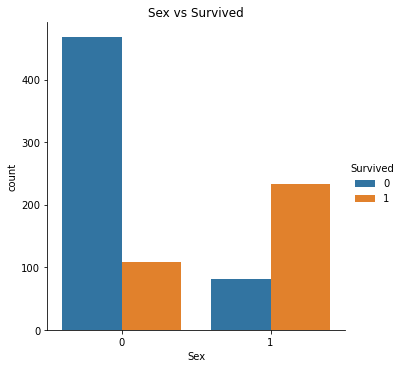

In [19]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = df)
plt.title("Sex vs Survived")

In above graph the x-axis representation of '0' denotes 'Male', and '1' represents 'Female'.

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

Text(0.5, 1.0, 'Pclass vs Survived')

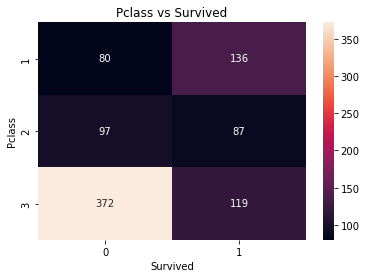

In [21]:
#Pclass (Ordinal Feature) vs Survived.

# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.title('Pclass vs Survived')

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

Text(0.5, 1.0, 'Age vs Survived')

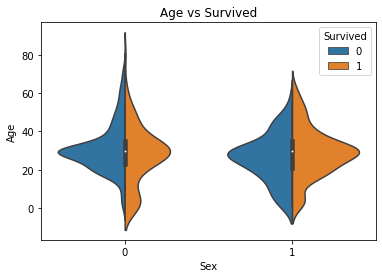

In [25]:
#Age (Continuous Feature) vs Survived  


# Violinplot Displays distribution of data across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = df, split = True)
plt.title("Age vs Survived")


In the X-axis the 0 denotes the 'Male', while 1 denotes the 'Female'.

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.
  

Text(0.5, 1.0, 'Alone vs Survived')

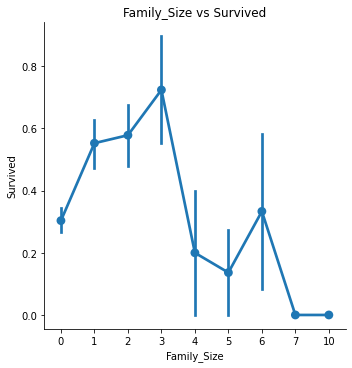

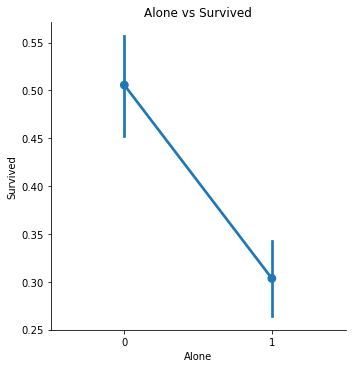

In [26]:
#Factor plot for Family_Size (Count Feature) and Family Size.  


# Adding a column Family_Sizetitanic['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
plt.title("Family_Size vs Survived")
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = df)
plt.title("Alone vs Survived")


Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of alone passenger against the one with a family.

Important observations – 

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decrease considerably.


Text(0.5, 1.0, 'Fare vs Survived')

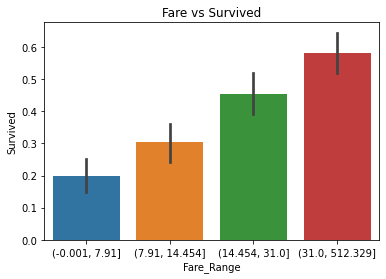

In [27]:
#Bar Plot for Fare (Continuous Feature)  


# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',data = df)
plt.title("Fare vs Survived")

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

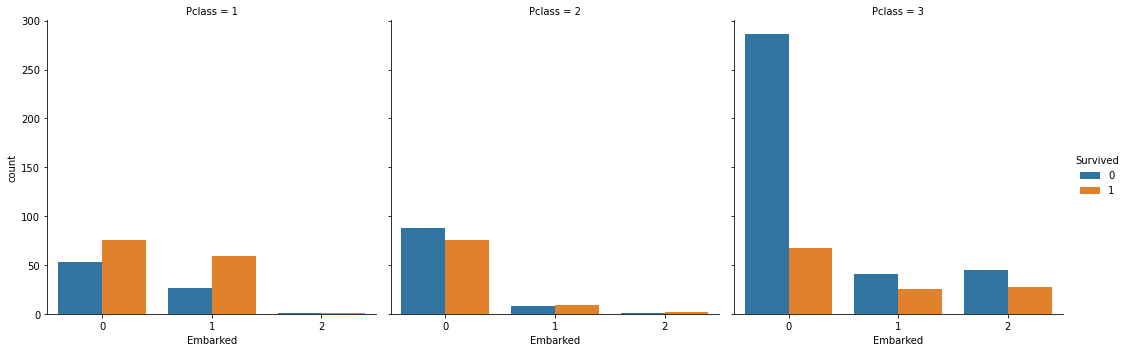

In [29]:
#Categorical Count Plots for Embarked Feature  


# Countplot
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

Here in X-axis 0 denotes 'S', 1 denotes 'C', while 2 denotes 'Q'.

Now, Some notable observations are: 

1. Majority of the passengers boarded from S. So, we had filled the values with S.
2. Majority of class 3 passengers boarded from Q.
3. S looks lucky for class 1 and 2 passengers compared to class 3.
  

In [30]:
corr=df.corr()

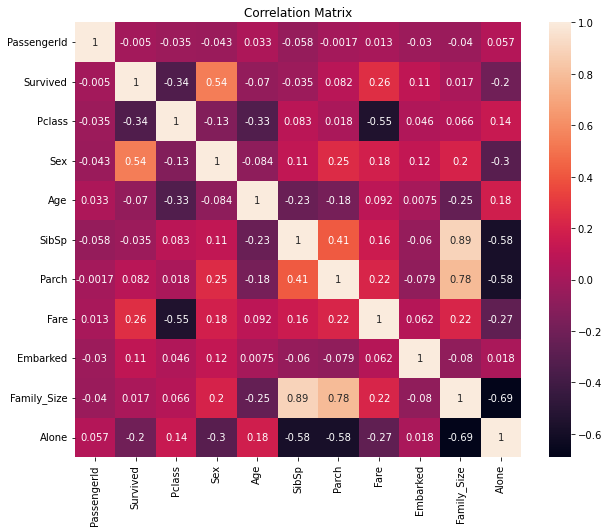

In [32]:
#Heat map to represent correlation matrix:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


The columns that can be dropped are:

PassengerId, Name, Ticket: They are strings, cannot be categorized and don’t contribute much to the outcome. We already droped cabin column .

And also lets dropped family_size and alone column and fare_range column as we add them to under the visualizatio odf data more effectively.

In [36]:
df_titanic= df.drop(columns = ['PassengerId','Name','Ticket','Alone','Family_Size','Fare_Range'], axis=1)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Checking for skewness and Outliers


In [37]:
df_titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

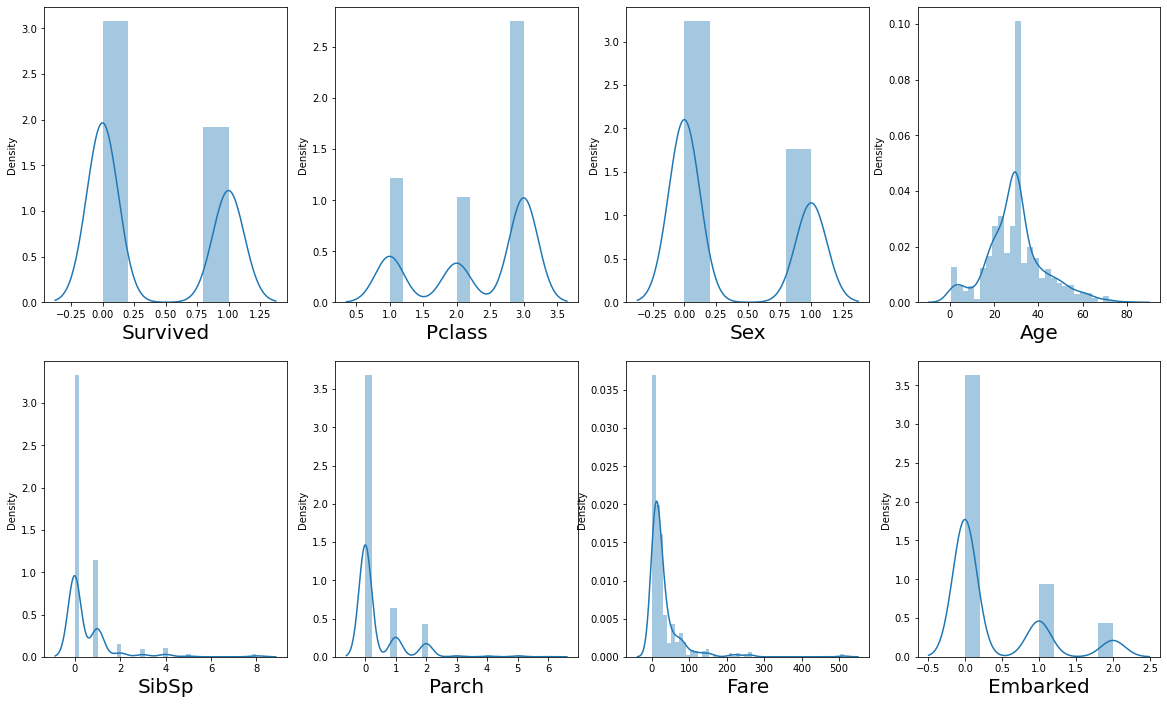

In [39]:
#let's see how our data is distributed for every coulmn and see how much skewed is our data.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df_titanic:
    if plotnumber<=8:                           #as there are 8 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_titanic[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

Survived is our Target variable, Pclass, Sex, Embarked are categorical data so, skewness and outliers of categorical data can't be dealth with.

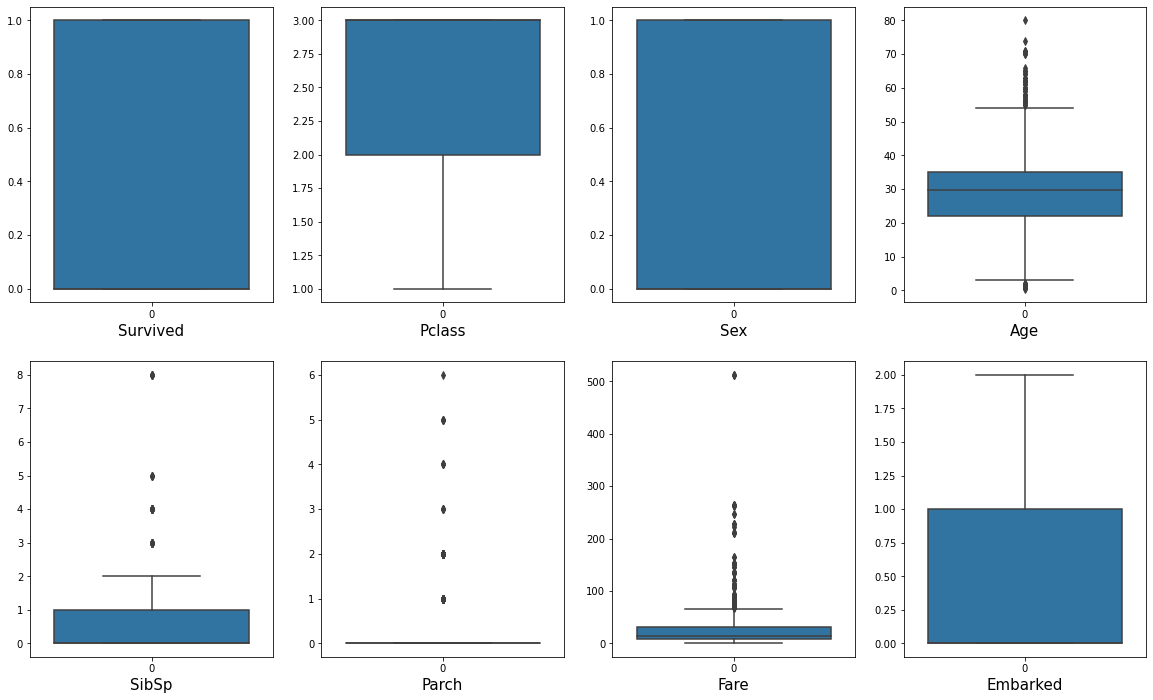

In [41]:
#for outliers lets plot boxplot, to make the picture clear.

#Visualize the outliers using boxplot (Outlier cannot applied to categorical data, this technique can be done only in continuous data)

plt.figure(figsize=(20,25))
graph=1

for column in df_titanic:
    if graph<=8:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_titanic[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

let's not disturb the data once considering categorical data,i.e. we can perform skewness on 'Age', 'Fare'

In [45]:
from scipy.stats import zscore
z_score=zscore(df_titanic[['Age','Fare']])
abs_z_score=np.abs(z_score)  # applying formula to get scaled data.
filtering_entry= (abs_z_score < 3).all(axis=1)
df_titanic=df_titanic[filtering_entry]
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,0.366983,2.378860,0.339667,29.257360,0.519002,0.353919,23.496476,0.356295
std,0.482268,0.799928,0.473878,12.406974,1.115343,0.786730,22.960392,0.640592
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,13.000000,0.000000
75%,1.000000,3.000000,1.000000,34.000000,1.000000,0.000000,27.900000,1.000000
max,1.000000,3.000000,1.000000,66.000000,8.000000,6.000000,113.275000,2.000000


In [46]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


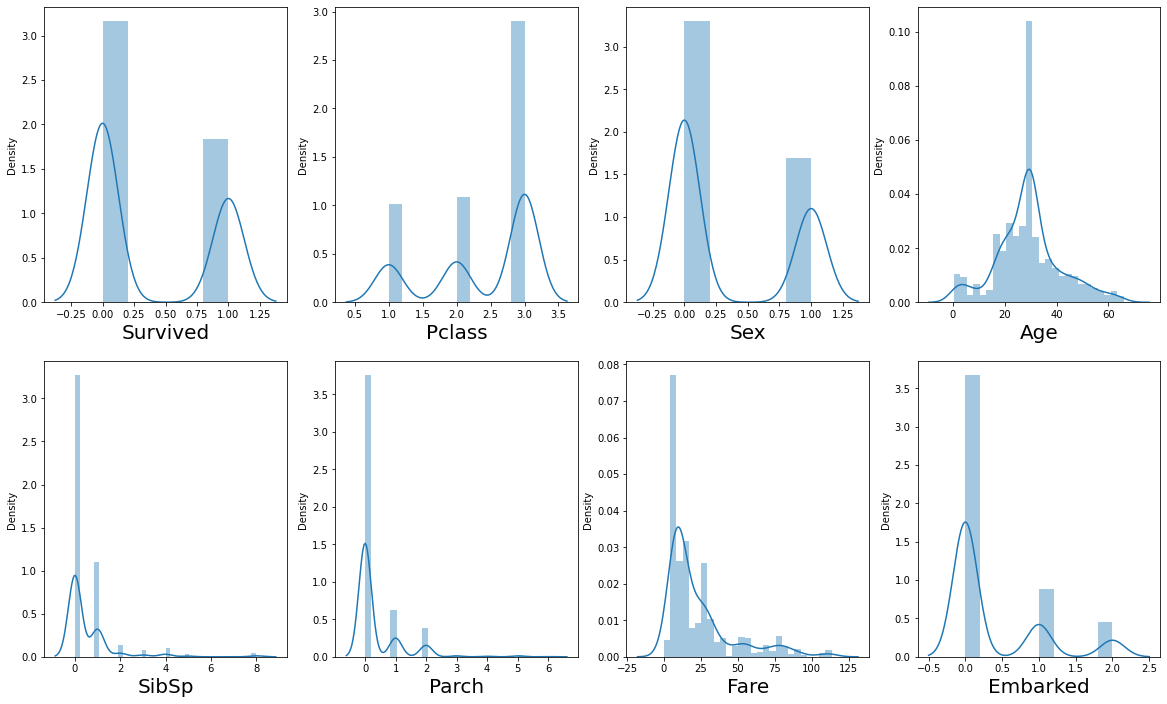

In [47]:
#let's check how much skewness is removed
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df_titanic:
    if plotnumber<=8:                           #as there are 8 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_titanic[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

In [49]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  842 non-null    int64  
 1   Pclass    842 non-null    int64  
 2   Sex       842 non-null    int64  
 3   Age       842 non-null    float64
 4   SibSp     842 non-null    int64  
 5   Parch     842 non-null    int64  
 6   Fare      842 non-null    float64
 7   Embarked  842 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 59.2 KB


# Scaling the data and Model Building.

Splitting data into target variable and Features.


In [50]:
X= df_titanic.drop(['Survived'], axis=1)
y=df_titanic['Survived']

In [51]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [52]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
print(X.shape)
print(y.shape)   #checking the dimension once again before moving ahead

(842, 7)
(842,)


In [54]:
from sklearn.preprocessing import StandardScaler  #scaling the data
scalar=StandardScaler()
X_scalar= scalar.fit_transform(X)

# KNeighborsClassifier Model

In [58]:
# KNN
from time import time
from sklearn.neighbors import KNeighborsClassifier


#Building model to test unexposed data

x_train,x_test,y_train,y_test = train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

#checking training and testing time(Lazy Learner)
start =time()
knn.fit(x_train,y_train)
print("Knn training time : ", (time() - start))

start=time()
y_pred= knn.predict(x_test)
print("Knn test time    : ",(time() - start))

Knn training time :  0.004996776580810547
Knn test time    :  0.018992900848388672


In [59]:
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[115,  20],
       [ 35,  41]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       135
           1       0.67      0.54      0.60        76

    accuracy                           0.74       211
   macro avg       0.72      0.70      0.70       211
weighted avg       0.73      0.74      0.73       211



In [81]:
#Hyper parameter tuning for KNeighborsClassifier

#determining what algorithm and parameter works better.
param_grid = {'algorithm' : ['kd_tree', 'brute','auto', 'ball_tree'],
             'leaf_size': [3,5,6,7,8],
             'n_neighbors': [3,5,7,9,11,13,15]}
#for KNeighboursClassifier
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

gridsearch.best_params_
print("Best params : ", gridsearch.best_params_)
#we will use the best parameters in our knn algorithm and check if accuracy is increasing .
knn=gridsearch.best_estimator_          #reinstantiating best parameters
 
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
cfm=confusion_matrix(y_test, y_pred)
print('\n Confusin matrix for Knn : \n', cfm)

print('\n Accuracy Score of Knn : ',accuracy_score(y_test,y_pred))

Best params :  {'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

 Confusin matrix for Knn : 
 [[114  21]
 [ 33  43]]

 Accuracy Score of Knn :  0.7440758293838863


In [82]:
print("\n Classification Report for KNeighborsClassifier : \n", classification_report(y_test,y_pred))


 Classification Report for KNeighborsClassifier : 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       135
           1       0.67      0.57      0.61        76

    accuracy                           0.74       211
   macro avg       0.72      0.71      0.71       211
weighted avg       0.74      0.74      0.74       211



In [90]:
#cross validation score
# Cross validation score to check if the model is overfitting

cross_val_score(knn, X_scalar, y, cv=10).mean()

0.8135994397759104

# Logistic Regression

In [108]:
maxAccu=0   #maximum accuracy
maxRS=0  #best random state value for which max accuracy is achieved
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR= LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)   #fitting the data will train your model
    y_pred=LR.predict(x_test)  #this is the predicted target variable
    acc=accuracy_score(y_test,y_pred)  #accuracy score
    print('accuracy', acc, 'random_state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        print('Max accuracy', maxAccu, 'at random state ',i)

accuracy 0.7455621301775148 random_state  1
Max accuracy 0.7455621301775148 at random state  1
accuracy 0.8224852071005917 random_state  2
Max accuracy 0.8224852071005917 at random state  2
accuracy 0.8757396449704142 random_state  3
Max accuracy 0.8757396449704142 at random state  3
accuracy 0.7692307692307693 random_state  4
accuracy 0.8402366863905325 random_state  5
accuracy 0.7810650887573964 random_state  6
accuracy 0.757396449704142 random_state  7
accuracy 0.7928994082840237 random_state  8
accuracy 0.7810650887573964 random_state  9
accuracy 0.8047337278106509 random_state  10
accuracy 0.7751479289940828 random_state  11
accuracy 0.8165680473372781 random_state  12
accuracy 0.7988165680473372 random_state  13
accuracy 0.7928994082840237 random_state  14
accuracy 0.8757396449704142 random_state  15
accuracy 0.7810650887573964 random_state  16
accuracy 0.8165680473372781 random_state  17
accuracy 0.7633136094674556 random_state  18
accuracy 0.7810650887573964 random_state  19
ac

accuracy 0.8284023668639053 random_state  181
accuracy 0.7869822485207101 random_state  182
accuracy 0.757396449704142 random_state  183
accuracy 0.8402366863905325 random_state  184
accuracy 0.8106508875739645 random_state  185
accuracy 0.7455621301775148 random_state  186
accuracy 0.7514792899408284 random_state  187
accuracy 0.7751479289940828 random_state  188
accuracy 0.7692307692307693 random_state  189
accuracy 0.7751479289940828 random_state  190
accuracy 0.757396449704142 random_state  191
accuracy 0.7751479289940828 random_state  192
accuracy 0.7928994082840237 random_state  193
accuracy 0.7988165680473372 random_state  194
accuracy 0.8106508875739645 random_state  195
accuracy 0.7455621301775148 random_state  196
accuracy 0.8165680473372781 random_state  197
accuracy 0.8165680473372781 random_state  198
accuracy 0.7751479289940828 random_state  199


At random state 3, the accuracy is .8757

In [109]:
print("best accuracy is ", maxAccu, "random state is ",maxRs)

best accuracy is  0.8757396449704142 random state is  3


In [110]:
# creating train test split for best random state
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.20, random_state=3)
LR.fit(x_train, y_train)
y_pred= LR.predict(x_test)
print("Accuracy ", accuracy_score(y_test, y_pred)*100) # testing accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  87.57396449704143
[[114  12]
 [  9  34]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       126
           1       0.74      0.79      0.76        43

    accuracy                           0.88       169
   macro avg       0.83      0.85      0.84       169
weighted avg       0.88      0.88      0.88       169



In [111]:
#Cross validation:

from sklearn.model_selection import cross_val_score

#validation accuracy
scr= cross_val_score(LR,X_scalar,y, cv=10)
print("Cross validation score for Logistic Regression model : ",scr.mean())

Cross validation score for Logistic Regression model :  0.7897619047619048


# Ensemble technique  

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test, y_pred)*100) # testing accuracy
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  75.82938388625593
[[118  17]
 [ 34  42]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       135
           1       0.71      0.55      0.62        76

    accuracy                           0.76       211
   macro avg       0.74      0.71      0.72       211
weighted avg       0.75      0.76      0.75       211



In [64]:
#Cross validation:

from sklearn.model_selection import cross_val_score

#validation accuracy
scr= cross_val_score(rf,X_scalar,y, cv=10)
print("Cross validation score for RandomForestClassifier model : ",scr.mean())

Cross validation score for RandomForestClassifier model :  0.813641456582633


In [72]:
#Hyper Parameter Tuning in randomForestClassifier:
RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

# creating parameter list to pass in GridSearchCV
params= {'max_features': ['auto','sqrt', 'log2'],
            'max_depth': [8,10,15,18,20],
             'criterion' : ['gini', 'entropy'],
            'n_estimators' :[13,15,17,19],
            'min_samples_split': [10,11]}

grd=GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best params : ", grd.best_params_)

rf=grd.best_estimator_      #reinstantiating best parameters

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

rf_conf_matrix= confusion_matrix(y_test,y_pred)

print('\n confusion matrix  :\n ', rf_conf_matrix)
print('\n Accuracy score for RandomForestClassifier : ', accuracy_score(y_test,y_pred))




Best params :  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 19}

 confusion matrix  :
  [[121  14]
 [ 32  44]]

 Accuracy score for RandomForestClassifier :  0.7819905213270142


In [74]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       135
           1       0.76      0.58      0.66        76

    accuracy                           0.78       211
   macro avg       0.77      0.74      0.75       211
weighted avg       0.78      0.78      0.77       211



# DecisionTree classifier model

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
clf.score(x_train,y_train)     #this is training score

0.9857369255150554

In [86]:
y_pred = clf.predict(x_test)

#check the accuracy
accuracy_score(y_test, y_pred)

0.7677725118483413

In [87]:
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[117,  18],
       [ 31,  45]], dtype=int64)

In [88]:
#Cross Validation

from sklearn.model_selection import cross_val_score
#cross validation for decison tree
cross_val_score(clf, X_scalar, y, cv=10).mean()

0.7697338935574229

In [92]:
# Hyper parameter tuning for Decision Tree Clasifier:

# Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
# we are tuning four important hyperparameters right now, we are passing the different values for both parameters 

grid_param={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10,15),             # the maximum depth of tree
    'max_leaf_nodes': range(2,10),
    'min_samples_leaf': range(2,10)    # maximum number of samples required to split at leaf node. 
}

grid_search= GridSearchCV(estimator= clf,param_grid=grid_param,
                          cv=5,n_jobs=-1) #Use all the cores in your system. for performance improvement

grid_search.fit(x_train,y_train)


best_parameters= grid_search.best_params_
print('\n Best parameters for Decision tree : ',best_parameters)

clf=grid_search.best_estimator_
clf.fit(x_train,y_train)

y_pred= clf.predict(x_test)
#check accuracy
print('\nAccuracy score for Decison tree : ',accuracy_score(y_test,y_pred))
print ('\n Confusion Matrix of Decision tree : \n',confusion_matrix(y_test,y_pred))
      


 Best parameters for Decision tree :  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 6}

Accuracy score for Decison tree :  0.7630331753554502

 Confusion Matrix of Decision tree : 
 [[125  10]
 [ 40  36]]


In [93]:
print('Classification Report : \n ',classification_report(y_test,y_pred))

Classification Report : 
                precision    recall  f1-score   support

           0       0.76      0.93      0.83       135
           1       0.78      0.47      0.59        76

    accuracy                           0.76       211
   macro avg       0.77      0.70      0.71       211
weighted avg       0.77      0.76      0.75       211



# Let's plot ROC AUC Curve to Choose best model


In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve


In [95]:
lr=LogisticRegression()
clf=DecisionTreeClassifier()
rf= RandomForestClassifier()
knn=KNeighborsClassifier()

In [96]:
# Train test split

X=df_titanic.drop(columns=['Survived'], axis=1)
y=df_titanic['Survived']
X_train,X_test, Y_train,Y_test=train_test_split(X,y,test_size=0.25, random_state=41)

#training with all classifier
lr.fit(X_train,Y_train)
clf.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

print("All models are trained")


All models are trained


In [97]:
# All models score captured
lr.score(X_test,Y_test)
clf.score(X_test,Y_test)
rf.score(X_test,Y_test)
knn.score(X_test,Y_test)

print("All models test Score captured")

All models test Score captured


# Let's check ROC_AUC for the fitted model

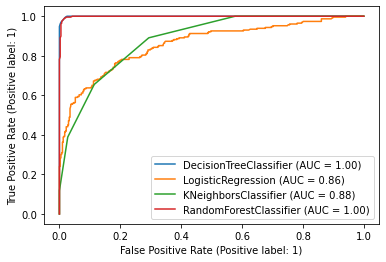

In [104]:
#how well our model perform on training data
disp=plot_roc_curve(clf,X_train, Y_train)

plot_roc_curve(lr, X_train,Y_train,ax=disp.ax_)   #ax_ = axes with confusion matrix

plot_roc_curve(knn, X_train,Y_train,ax=disp.ax_)

plot_roc_curve(rf, X_train,Y_train,ax=disp.ax_)

plt.legend(prop={'size':10}, loc= 'lower right')

plt.show()


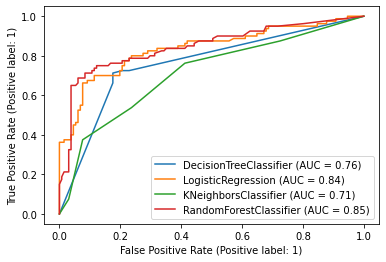

In [105]:
# How well our model works on test data

disp=plot_roc_curve(clf,X_test, Y_test)

plot_roc_curve(lr, X_test,Y_test,ax=disp.ax_)   #ax_ = axes with confusion matrix

plot_roc_curve(knn, X_test,Y_test,ax=disp.ax_)

plot_roc_curve(rf, X_test,Y_test,ax=disp.ax_)

plt.legend(prop={'size':10}, loc= 'lower right')

plt.show()


We can see that Logistic Regression is better fit in our case, since its accuracy score for test and train model are almost on the same line.
Although randomforestClassifier gives higher score but we can see their is difference between testingmodel and training model.


# Saving the model.


In [112]:
#PICKELING of FILE OR SERIALIZATION OF A FILE

import joblib
joblib.dump(lr, "titanic.pkl")

['titanic.pkl']